In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_excel('Buildings_inf.xlsx')

In [3]:
df

,No. of Lands,Land Area,Plot Ratio,Average No. of Floors on Each Building,Average No. of Units in Each Building,No. of Households per floor in the unit,Average Length of the Building,Average Width of the Building,Average Road Width Inside
0,1,32862,3.0,13,2,4,19,9,8
1,2,130731,3.0,18,4,5,25,9,3
2,3,128114,2.7,17,1,3,32,7,6
3,4,143898,2.7,14,4,4,16,13,9
4,5,113339,2.7,18,4,2,15,13,6
...,...,...,...,...,...,...,...,...,...
105,106,32993,1.7,9,2,5,19,9,4
106,107,46325,1.5,16,4,4,15,7,4
107,108,41171,1.2,8,1,4,32,7,6
108,109,91309,1.2,15,1,4,25,14,5


<AxesSubplot:xlabel='Average Length of the Building', ylabel='Average Width of the Building'>

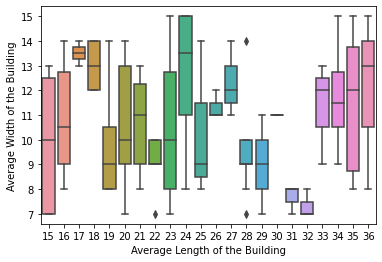

In [57]:
sns.boxplot(data=df, x='Average Length of the Building', y='Average Width of the Building')

In [6]:
df.drop('No. of Lands', axis=1, inplace=True)

In [8]:
df.columns

Index(['Land Area', 'Plot Ratio', 'Average No. of Floors on Each Building',
       'Average No. of Units in Each Building',
       'No. of Households per floor in the unit',
       'Average Length of the Building', 'Average Width of the Building',
       'Average Road Width Inside'],
      dtype='object')

In [16]:
df.sample(10)

,Land Area,Plot Ratio,Average No. of Floors on Each Building,Average No. of Units in Each Building,No. of Households per floor in the unit,Average Length of the Building,Average Width of the Building,Average Road Width Inside
48,149269,1.2,9,2,4,17,14,8
52,55329,1.0,11,4,4,34,11,8
31,34303,2.0,17,3,2,24,15,3
104,58342,1.8,9,1,3,34,15,4
1,130731,3.0,18,4,5,25,9,3
97,52873,2.0,11,1,3,33,12,4
18,47019,1.5,9,3,5,20,7,7
95,86713,2.0,7,2,5,21,11,5
19,49652,1.5,7,3,3,28,7,5
36,51653,1.5,9,3,3,23,12,8


In [194]:
# data selection..

model_df = df[(df['Average No. of Floors on Each Building'] <= 14) &
              (df['Average No. of Units in Each Building'] <=3) &
              (df['No. of Households per floor in the unit']<=4) &
              (df['Average Length of the Building'] <=20) &
              (df['Average Width of the Building'] <=17)
             ]
model_df.shape

(10, 8)

In [195]:
model_df

,Land Area,Plot Ratio,Average No. of Floors on Each Building,Average No. of Units in Each Building,No. of Households per floor in the unit,Average Length of the Building,Average Width of the Building,Average Road Width Inside
0,32862,3.0,13,2,4,19,9,8
8,95328,2.0,7,1,3,20,13,7
30,73839,2.0,12,2,4,15,12,8
48,149269,1.2,9,2,4,17,14,8
53,87043,1.0,8,3,4,20,13,5
57,43035,2.5,13,3,2,18,14,5
58,36399,2.5,7,3,2,20,10,8
72,83826,1.8,10,3,3,20,13,5
80,135628,1.7,10,3,2,20,10,8
89,60567,1.2,13,3,3,20,12,5


In [196]:
for col in model_df.columns:
    if col != 'Land Area' and col != 'Plot Ratio':
        print(model_df[col].value_counts())

13    3
7     2
10    2
12    1
9     1
8     1
Name: Average No. of Floors on Each Building, dtype: int64
3    6
2    3
1    1
Name: Average No. of Units in Each Building, dtype: int64
4    4
3    3
2    3
Name: No. of Households per floor in the unit, dtype: int64
20    6
19    1
15    1
17    1
18    1
Name: Average Length of the Building, dtype: int64
13    3
12    2
14    2
10    2
9     1
Name: Average Width of the Building, dtype: int64
8    5
5    4
7    1
Name: Average Road Width Inside, dtype: int64


In [197]:
# feature selection and engineering


features = model_df[['Land Area','Plot Ratio']]
target = ['Average No. of Floors on Each Building','Average No. of Units in Each Building',
          'No. of Households per floor in the unit','Average Length of the Building',
        'Average Width of the Building','Average Road Width Inside']

In [198]:
test_data = np.reshape([96481, 3], (1,-1))

In [199]:
for i in range(len(target)):
    X_train, X_test, y_train, y_test = train_test_split(features, model_df[target], test_size=3)


In [200]:
y_train

,Average No. of Floors on Each Building,Average No. of Units in Each Building,No. of Households per floor in the unit,Average Length of the Building,Average Width of the Building,Average Road Width Inside
57,13,3,2,18,14,5
53,8,3,4,20,13,5
89,13,3,3,20,12,5
58,7,3,2,20,10,8
0,13,2,4,19,9,8
30,12,2,4,15,12,8
48,9,2,4,17,14,8


In [223]:
# training with simple linear regression

linReg_model_output = []
for col in y_train.columns:
    lin_regression = LinearRegression()
    lin_regression.fit(X_train, y_train[col])
    preds = lin_regression.predict(test_data)
    linReg_model_output.append(preds[0])
    
linReg_model_output

[10.695261015287471,
 1.447162343746828,
 3.7693652684572494,
 15.316465738111988,
 11.695008901831391,
 10.129029789767287]

In [202]:
# Using ElasticNet 

elasticnet_model_output = []
for col in target:
    elastic_net= ElasticNet(alpha=2.0, max_iter=100, random_state=42)
    elastic_net.fit(X_train, y_train[col])
    preds = elastic_net.predict(test_data)
    elasticnet_model_output.append(preds[0])
    
elasticnet_model_output

[10.10267532934838,
 2.435625185187435,
 3.634031372209108,
 17.937848997805894,
 12.83290080586563,
 6.850419198428329]

In [203]:
# Using Lasso Regression

lasso_reg_model_output = []
for col in target:
    lasso_reg= Lasso(alpha=0.5, max_iter=3000, random_state=42, selection='random')
    lasso_reg.fit(X_train, y_train[col])
    preds = lasso_reg.predict(test_data)
    lasso_reg_model_output.append(preds[0])
    
lasso_reg_model_output

[10.102665620154383,
 2.435615476329657,
 3.634041081217055,
 17.93783928869732,
 12.832910515215998,
 7.086880936072507]

In [222]:
# Using Random Forest Regression

random_forest_model_output = []
for col in target:
    random_forest= RandomForestRegressor(random_state=42)
    random_forest.fit(X_train, y_train[col])
    preds = random_forest.predict(test_data)
    random_forest_model_output.append(preds[0])
    
np.floor(random_forest_model_output)

array([10.,  2.,  3., 17., 12.,  6.])

In [217]:
# Using Gradient boosting

gradboost_model_output = []
for col in target:
    gradboost= RandomForestRegressor(random_state=42)
    gradboost.fit(X_train, y_train[col])
    preds = gradboost.predict(test_data)
    gradboost_model_output.append(preds[0])
    
gradboost_model_output

[10.48, 2.41, 3.39, 17.34, 12.28, 6.83]

# Redo Feature selection 